In [117]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside the notebook
%matplotlib inline

# Load the dataset
df=pd.read_csv(r'C:\Users\Adnsu\Desktop\netflix_titles.csv')

# Display the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [118]:
# Create a summary table for missing values (in percentage)
missing_summary = (df.isna().mean() * 100).reset_index()
missing_summary.columns = ["column", "null_rate_percent"]

# Keep only columns that have missing values
missing_summary = missing_summary[missing_summary["null_rate_percent"] > 0]

# Sort columns by missing rate (descending)
missing_summary.sort_values(by="null_rate_percent", ascending=False, inplace=True)

# Round the percentages to 2 decimal places
missing_summary.round(2)


,column,null_rate_percent
3,director,29.91
5,country,9.44
4,cast,9.37
6,date_added,0.11
8,rating,0.05
9,duration,0.03


In [119]:
# Fill missing countries with the most frequent value (mode)
df["country"] = df["country"].fillna(df["country"].mode()[0])

# Replace missing values in 'cast' and 'director' with a placeholder
df["cast"] = df["cast"].fillna("No Data")
df["director"] = df["director"].fillna("No Data")

# Remove remaining missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [120]:
# Check the number of missing values in each column
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [121]:
# Display DataFrame structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [122]:
# Convert 'date_added' to datetime, invalid values -> NaT
df['date_added'] = pd.to_datetime(
    df['date_added'],
    format='mixed',
    dayfirst=False,
    errors='coerce'
)

# Convert 'release_year' to nullable integer type
df['release_year'] = df['release_year'].astype('Int64')

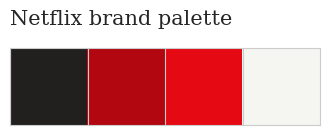

In [123]:
# Netflix brand color palette
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])

# Add title to the palette visualization
plt.title(
    "Netflix brand palette",
    loc='left',
    fontfamily='serif',
    fontsize=15,
    y=1.2
)

# Display the plot
plt.show()

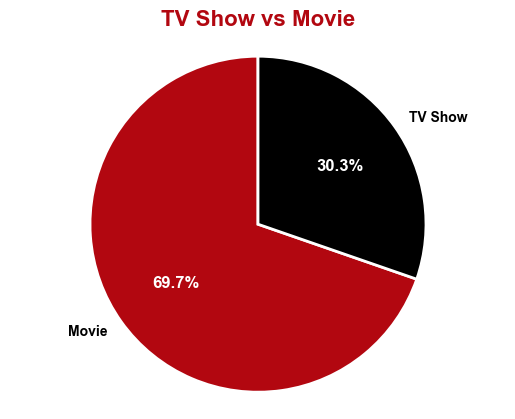

In [124]:
# --- TV Shows vs Movies Distribution ---

# Count content types
counts = df['type'].value_counts()

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#b20710', 'black']
)

# Style labels and percentages
for t in texts: t.set_color('black'); t.set_weight('bold')
for a in autotexts: a.set_color('white'); a.set_fontsize(12); a.set_weight('bold')
for w in wedges: w.set_edgecolor('white'); w.set_linewidth(2)

plt.title("TV Show vs Movie", fontsize=16, color='#b20710', fontweight='bold', pad=10)
plt.axis('equal')
plt.show()


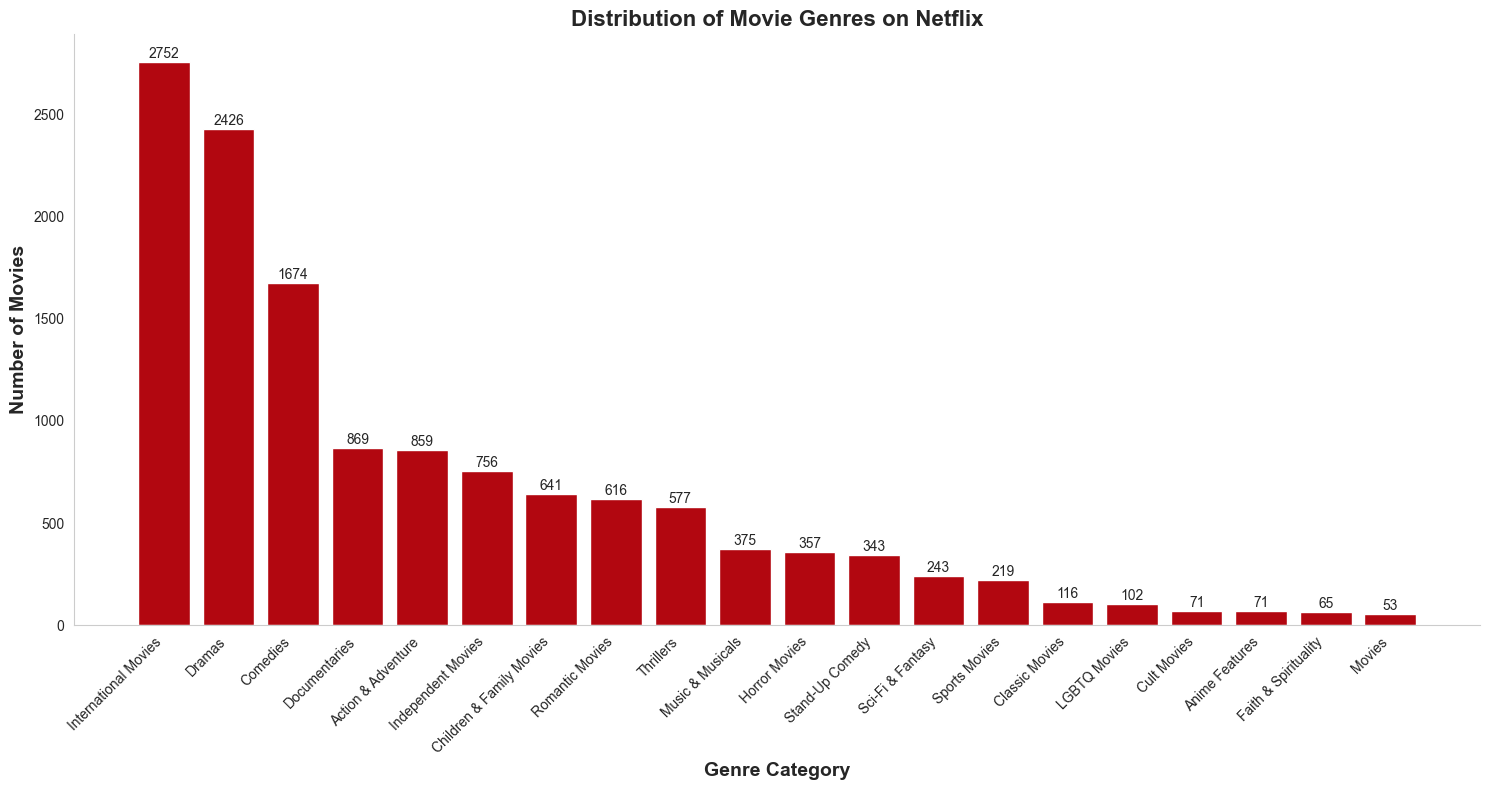

In [125]:
# --- Movie Genre Distribution on Netflix ---

# Count movie genres
genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts()

# Plot bar chart
plt.figure(figsize=(15,8))
ax = plt.gca()
bars = ax.bar(genres.index, genres.values, color='#b20710')

# Add title and labels
plt.title("Distribution of Movie Genres on Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Genre Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of Movies", fontsize=14, fontweight='bold')

# Rotate x labels and annotate values
plt.xticks(rotation=45, ha='right')
for b in bars:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 5, int(b.get_height()),
            ha='center', va='bottom', fontsize=10)

# Clean styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()


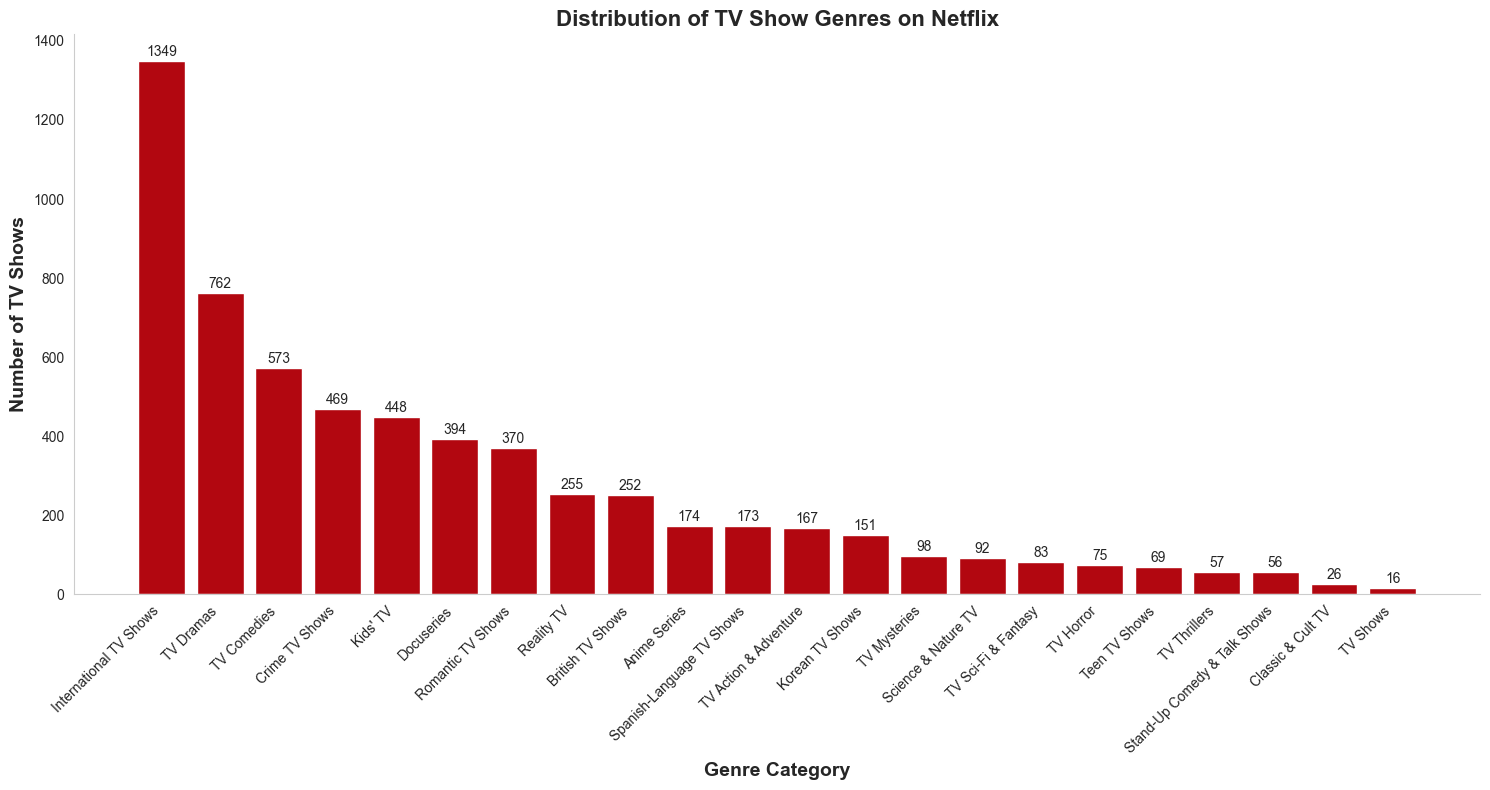

In [126]:
# --- TV Show Genre Distribution on Netflix ---

# Count TV Show genres
genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts()

# Plot bar chart
plt.figure(figsize=(15,8))
ax = plt.gca()
bars = ax.bar(genres.index, genres.values, color='#b20710')

# Add title and labels
plt.title("Distribution of TV Show Genres on Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Genre Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of TV Shows", fontsize=14, fontweight='bold')

# Rotate x labels and annotate values
plt.xticks(rotation=45, ha='right')
for b in bars:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 5, int(b.get_height()),
            ha='center', va='bottom', fontsize=10)

# Clean styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()


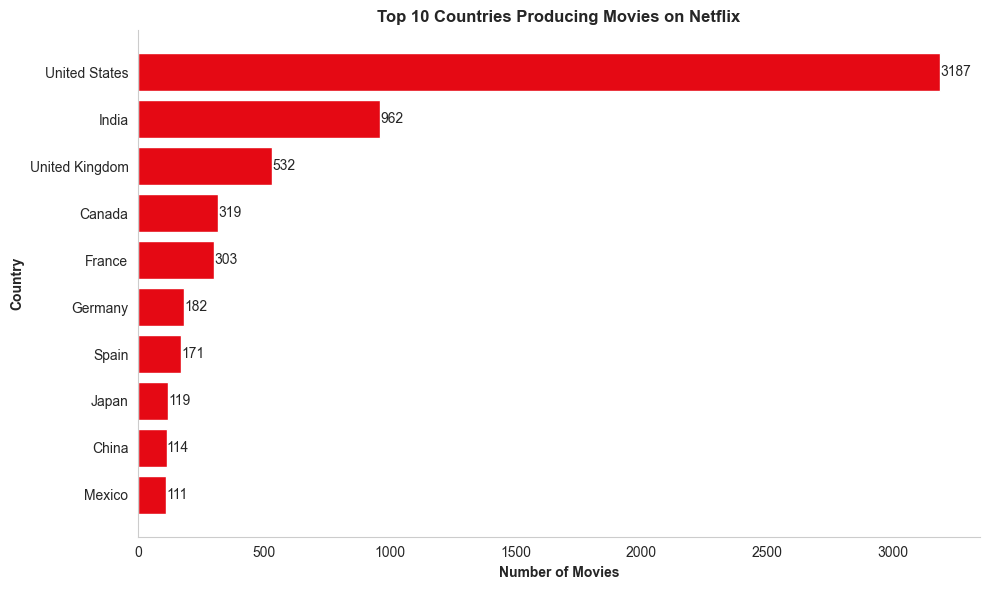

In [42]:
# --- Top 10 Countries Producing Movies on Netflix ---

# Top 10 Countries Producing Movies
top_countries = (
    df[df['type'] == 'Movie']['country']
    .str.split(', ').explode()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
bars = plt.barh(top_countries.index, top_countries.values, color='#e50914')  # Horizontal bar chart

# Add exact values next to bars
for bar, val in zip(bars, top_countries.values):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(val), va='center')

# Format axes
ax = plt.gca()
ax.invert_yaxis()                  # Largest value on top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and title
plt.xlabel("Number of Movies", fontweight='bold')
plt.ylabel("Country", fontweight='bold')
plt.title("Top 10 Countries Producing Movies on Netflix", fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()


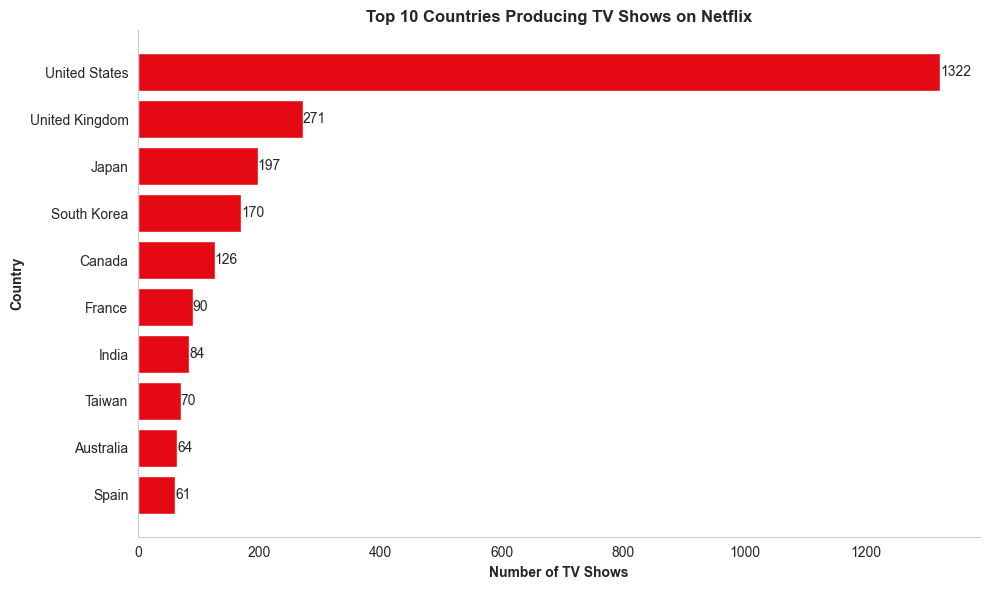

In [43]:
# --- Top 10 Countries Producing TV Shows on Netflix ---

# Top 10 Countries Producing TV Shows
top_countries = (
    df[df['type'] == 'TV Show']['country']
    .str.split(', ').explode()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
bars = plt.barh(top_countries.index, top_countries.values, color='#e50914')  # Horizontal bar chart

# Add exact values next to bars
for bar, val in zip(bars, top_countries.values):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, str(val), va='center')

# Format axes
ax = plt.gca()
ax.invert_yaxis()                  # Largest value on top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels and title
plt.xlabel("Number of TV Shows", fontweight='bold')
plt.ylabel("Country", fontweight='bold')
plt.title("Top 10 Countries Producing TV Shows on Netflix", fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

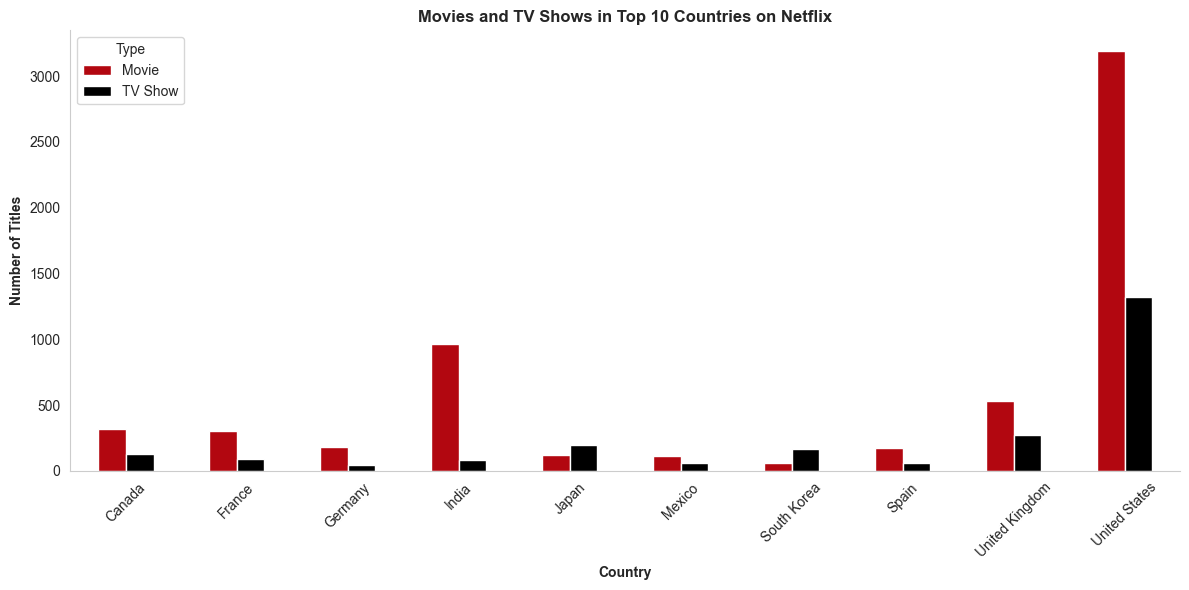

In [127]:
# --- Movies vs TV Shows in Top 10 Countries ---

# Split multi-country entries and keep top 10 countries
data = df.dropna(subset=['country']).assign(country=df['country'].str.split(', ')).explode('country')
top10 = data['country'].value_counts().head(10).index

# Count Movies and TV Shows within top 10 countries
counts = data[data['country'].isin(top10)].groupby(['country','type']).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = counts.plot(kind='bar', figsize=(12,6), color=['#b20710','black'])
plt.title("Movies and TV Shows in Top 10 Countries on Netflix", fontweight='bold')
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Number of Titles", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(False)

# Clean chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

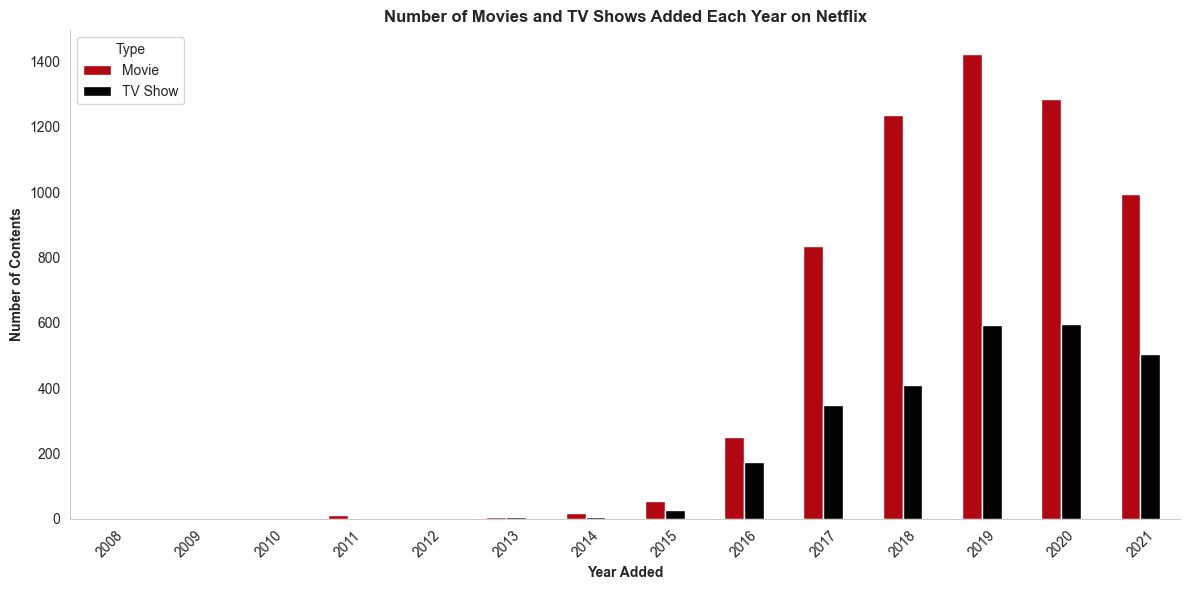

In [128]:
# --- Number of Movies and TV Shows Added Each Year on Netflix ---

# Number of Movies and TV Shows by Year Added on Netflix
df['year_added'] = df['date_added'].dt.year.astype('Int64')  # Extract year from 'date_added'

# Group by year and type
year_sorting = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plot bar chart
ax = year_sorting.plot(kind='bar', figsize=(12,6), stacked=False, color=['#b20710', 'black'])

# Labels and title
plt.title("Number of Movies and TV Shows Added Each Year on Netflix", fontweight='bold')
plt.xlabel("Year Added", fontweight='bold')  # Correct x-axis label
plt.ylabel("Number of Contents", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper left')
plt.grid(False)

# Format axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()

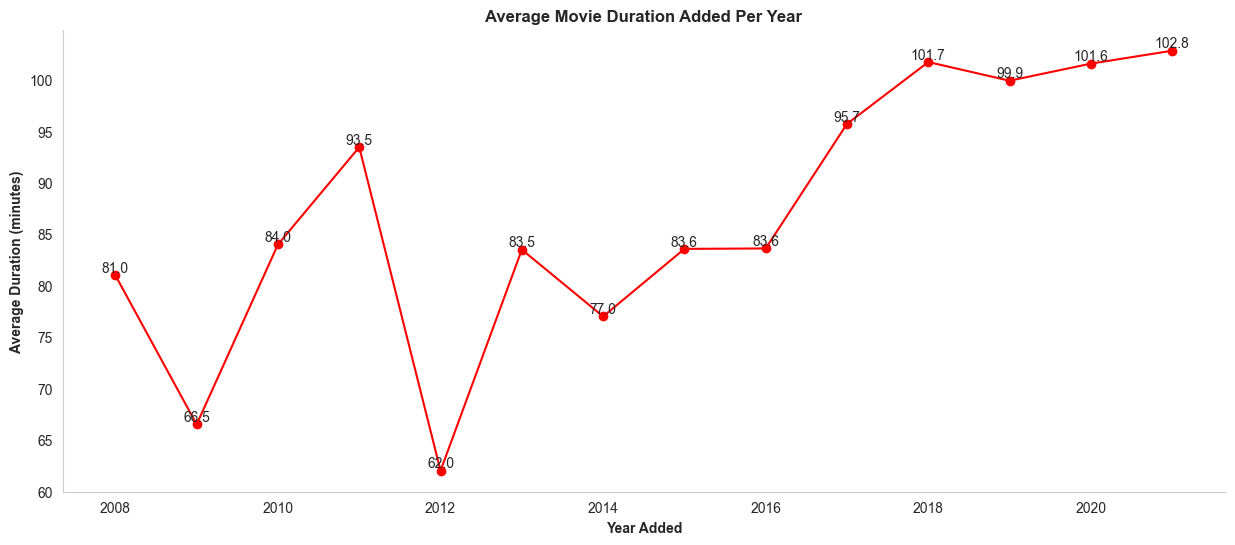

In [129]:
# --- Average Movie Duration Added Per Year on Netflix ---

# Filter only Movies
df_movie = df[df['type'] == 'Movie'].copy()

# Convert 'duration' to numeric (remove ' min' and handle errors)
df_movie['duration'] = pd.to_numeric(df_movie['duration'].str.replace(' min', '', regex=False), errors='coerce')

# Extract year from 'date_added'
df_movie['added_year'] = df_movie['date_added'].dt.year

# Calculate average duration per year
movie_duration = df_movie.groupby('added_year')['duration'].mean()

# Plot line chart
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(movie_duration.index, movie_duration.values, marker='o', color='red')

# Annotate values on the line
for x, y in zip(movie_duration.index, movie_duration.values):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.title("Average Movie Duration Added Per Year", fontweight='bold')
plt.xlabel("Year Added", fontweight='bold')
plt.ylabel("Average Duration (minutes)", fontweight='bold')
plt.grid(False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

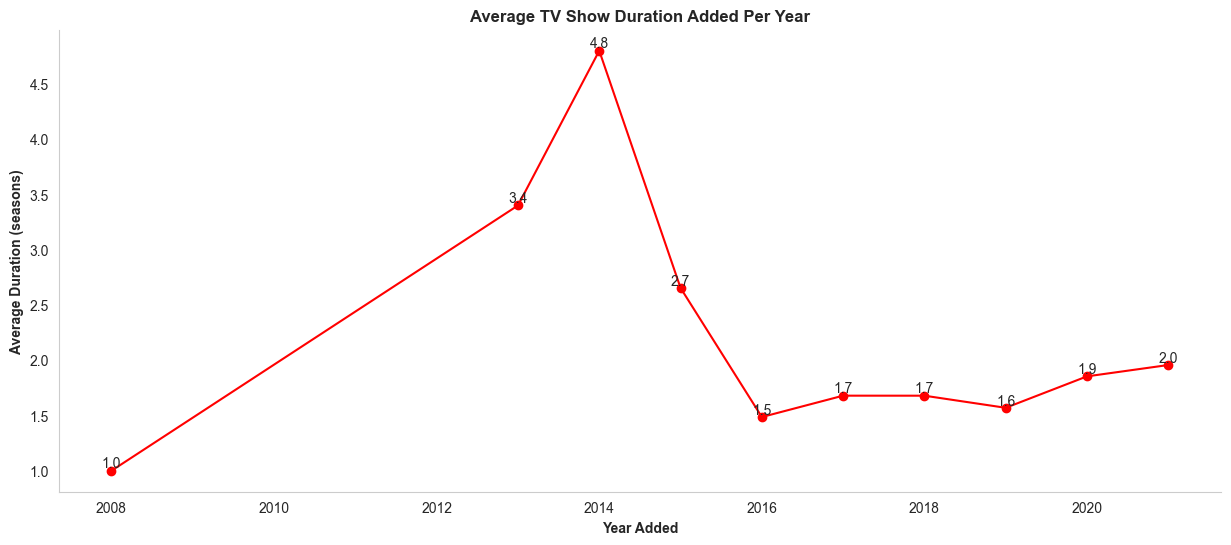

In [130]:
# --- Average TV Show Duration Added Per Year on Netflix ---

# Filter only TV Shows
df_tv_show = df[df['type'] == 'TV Show'].copy()

# Remove 'Season' or 'Seasons' from duration and convert to numeric
df_tv_show['duration'] = df_tv_show['duration'].str.replace(' Seaso?n?s?', '', regex=True)
df_tv_show['duration'] = pd.to_numeric(df_tv_show['duration'], errors='coerce')

# Extract year from 'date_added'
df_tv_show['added_year'] = df_tv_show['date_added'].dt.year

# Calculate average duration per year
tv_show_duration = df_tv_show.groupby('added_year')['duration'].mean()

# Plot line chart
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(tv_show_duration.index, tv_show_duration.values, marker='o', color='red')

# Annotate values on the line
for x, y in zip(tv_show_duration.index, tv_show_duration.values):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.title("Average TV Show Duration Added Per Year", fontweight='bold')
plt.xlabel("Year Added", fontweight='bold')
plt.ylabel("Average Duration (seasons)", fontweight='bold')
plt.grid(False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

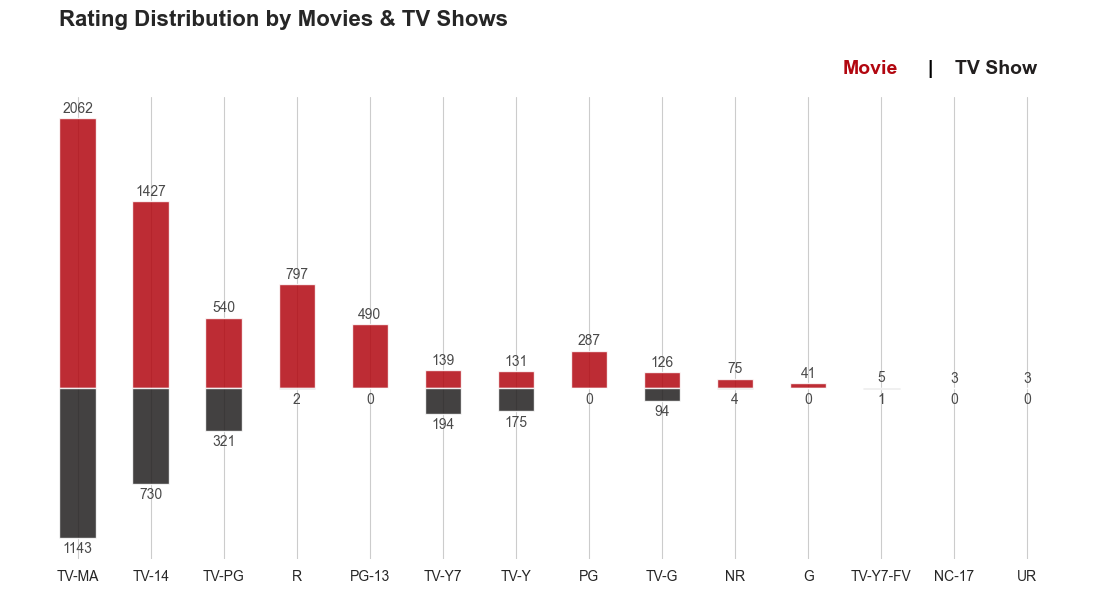

In [95]:
# --- Rating Distribution by Movies & TV Shows  ---

# Add helper column for counting
df['count'] = 1

# Determine rating order by overall frequency
rating_order = list(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index()['rating'])

# Count ratings per type and align columns
mf = df.groupby('type')['rating'].value_counts().unstack().fillna(0).astype(int)[rating_order]

# Separate Movie and TV Show counts (TV Show negative for mirrored effect)
movie = mf.loc['Movie']
tv = -mf.loc['TV Show']

# Plot
fig, ax = plt.subplots(figsize=(14,6))
bars_movie = ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.85)
bars_tv = ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.85)

# Annotate bars with values
for i in movie.index:
    ax.text(i, movie[i]+25, str(movie[i]), ha='center', va='bottom', fontsize=10, color='#4a4a4a', fontweight='light')
for i in tv.index:
    ax.text(i, tv[i]-25, str(-tv[i]), ha='center', va='top', fontsize=10, color='#4a4a4a', fontweight='light')

# Remove spines and y-ticks
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])

# Add main title
fig.text(0.16, 1, 'Rating Distribution by Movies & TV Shows', fontsize=16, fontweight='bold')

# Add manual legend
fig.text(0.72,0.92,"Movie", fontweight="bold", fontsize=14, color='#b20710')
fig.text(0.78,0.92,"|", fontweight="bold", fontsize=14, color='black')
fig.text(0.80,0.92,"TV Show", fontweight="bold", fontsize=14, color='#221f1f')

plt.show()

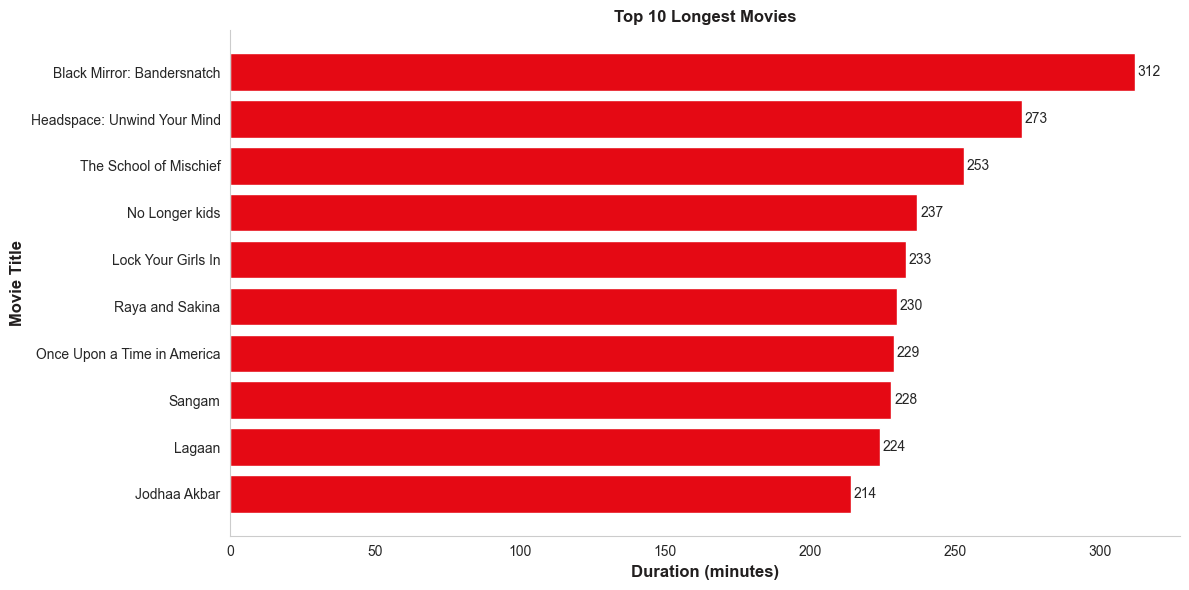

In [133]:
# --- Top 10 Longest Movies on Netflix ---

# Select top 10 movies by duration
top10 = df_movie[['title','duration']].sort_values('duration', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
ax = plt.barh(top10['title'], top10['duration'], color='#e50914')
plt.gca().invert_yaxis()  # Largest duration on top

# Annotate bars with duration values
for i, v in enumerate(top10['duration']):
    plt.text(v + 1, i, str(int(v)), va='center', fontsize=10)

# Add title and axis labels
plt.title("Top 10 Longest Movies", fontweight="bold", fontsize=12, color='#221f1f')
plt.xlabel("Duration (minutes)", fontweight="bold", fontsize=12, color='#221f1f')
plt.ylabel("Movie Title", fontweight="bold", fontsize=12, color='#221f1f')

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()



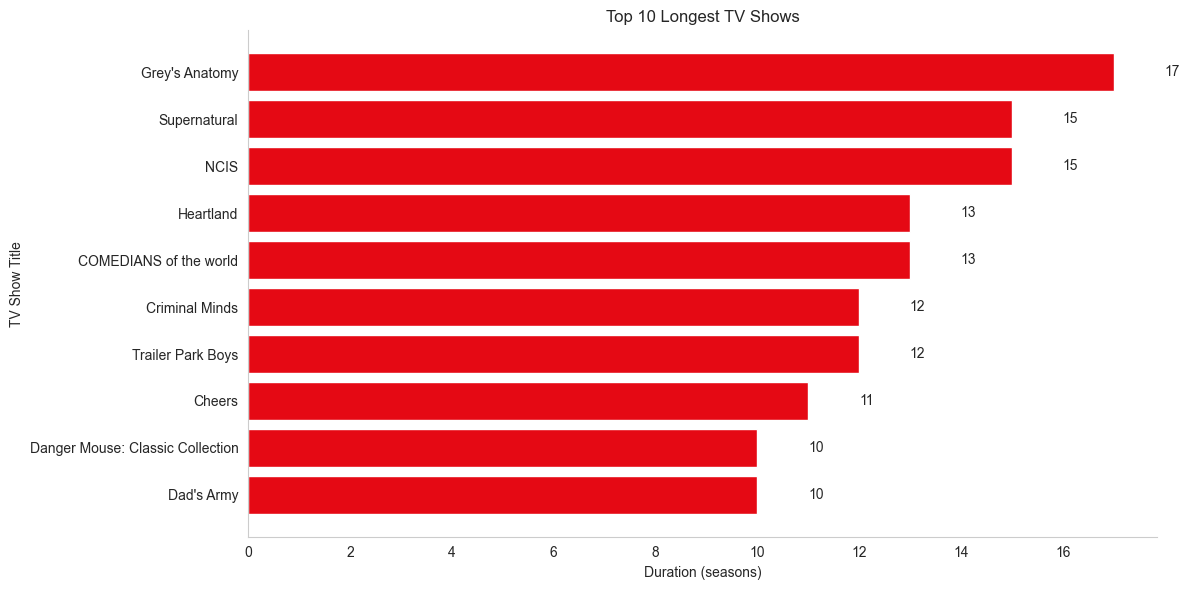

In [106]:
# --- Top 10 Longest TV Shows on Netflix ---

# Select top 10 TV Shows by duration
tv_show_new = df_tv_show[['title','duration']].sort_values('duration', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
plt.barh(tv_show_new['title'], tv_show_new['duration'], color='#e50914')
plt.gca().invert_yaxis()  # Largest duration on top

# Annotate bars with duration values
for i, v in enumerate(tv_show_new['duration']):
    plt.text(v + 1, i, str(int(v)), va='center', fontsize=10)

# Add title and axis labels
plt.title("Top 10 Longest TV Shows")
plt.xlabel("Duration (seasons)")
plt.ylabel("TV Show Title")

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()


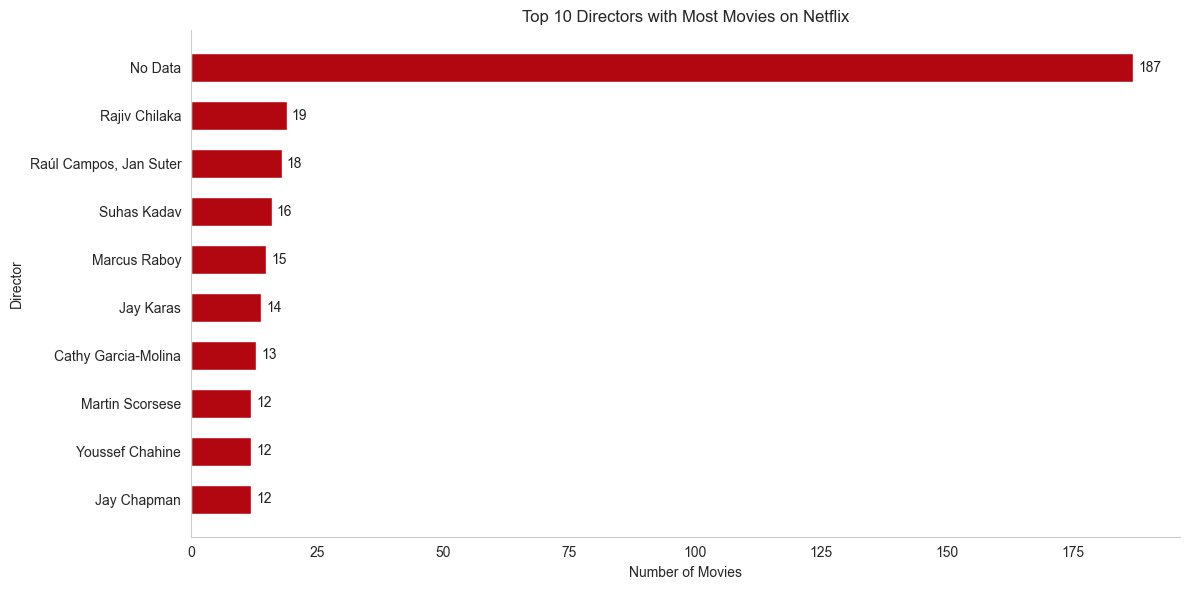

In [113]:
# --- Top 10 Directors with Most Movies on Netflix ---

# Filter Movie records and remove missing directors
movies = df[df['type'] == 'Movie'].dropna(subset=['director'])

# Count top 10 directors by number of movies
top_directors = movies['director'].value_counts().head(10)

# Plot horizontal bar chart
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(top_directors.index, top_directors.values, color='#b20710', height=0.6)
ax.invert_yaxis()  # Highest value on top

# Annotate bar values
for i, v in enumerate(top_directors.values):
    ax.text(v + 1, i, str(v), va='center', color='#221f1f')

# Add title and axis labels
plt.title("Top 10 Directors with Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Director")

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()
